# Комментарий наставника
Отлично! 

Я дал большой комментарий в конце. Не уверен в его справедливости, но кажется он логичен. 

В любом случае, проект принял. У тебя есть выходные, чтобы отдохнуть перед следующим модулем :)

Удачи! Думаю, наставники опять сменятся. Рад бы с тобой работать!

# Комментарий наставника
Сергей, привет! 


Кажется, что все круто. Есть, правда, некоторая загвоздка с проверкой гипотез. 

У тебя немного разъехалось. Проверить мы хотим различия в доле пользователей которые сделали то или иное событие. При этом ты передаешь в тест абсолютные значения разбитые по датам. Сравнение абсолютных значений само по себе идея и не очень, т.к. это здесь доли в группах одинаковые (ААВ - все три группы примерно одного размера). Но чаще всего экспериментальный формат раскатывается на очень небольшой объем трафика и тут уже ни о каком сравнении абсолютных значений речь не пойдет. 

Авторы курса тут имели в виду немного другое. Не хочу совсем уж подсказывать (а я нашел соответствующую главу в материалах курса), но речь идёт по сути о ручной проверке того, что доля для каждого действия (полученная в тесте) укладывется в нормальное распределение на основе всех данных или не укладывается. Поправь, пожалуйста, эту штуку. В остальном - отличная, чистая работа.

# Комментарий наставника (II)

Либо я слишком туманный дал комментарий, либо ты на него неочевидно отреагировал. Я писал про вот тему: Принятие решений в бизнесе на основе данных -> Проверка гипотезы о равенстве долей

Нам нужно проверить факт совпадение долей перешедших с шага 1 к шагу 2, с шага один к шагу 3, ит.д.

Если вдруг совсем запутался, но напиши комментарий с вопросами и отправь мне работу. Я попробую пояснить подробнее. 

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

# Шаг 1. Прочитаем данные и просмотрим как выглядет таблица

In [2]:
data = pd.read_csv('/datasets/logs_exp.csv', sep = '\t')

In [3]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [5]:
data['time'] = pd.to_datetime(data['EventTimestamp'], unit = 's')

In [6]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42


In [7]:
data.groupby('EventName').agg({'EventName': 'count'})

,EventName
EventName,
CartScreenAppear,42731
MainScreenAppear,119205
OffersScreenAppear,46825
PaymentScreenSuccessful,34313
Tutorial,1052


In [8]:
data.groupby('EventName').agg({'EventName': 'count'}).sum()

EventName    244126
dtype: int64

In [9]:
data.groupby('DeviceIDHash').agg({'DeviceIDHash': 'count'})

,DeviceIDHash
DeviceIDHash,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


In [10]:
data.groupby('ExpId').agg({'ExpId': 'count'})

,ExpId
ExpId,
246,80304
247,78075
248,85747


In [11]:
data.duplicated().sum()

413

In [12]:
data[data.duplicated()]

,EventName,DeviceIDHash,EventTimestamp,ExpId,time
453,MainScreenAppear,5613408041324010552,1564474784,248,2019-07-30 08:19:44
2350,CartScreenAppear,1694940645335807244,1564609899,248,2019-07-31 21:51:39
3573,MainScreenAppear,434103746454591587,1564628377,248,2019-08-01 02:59:37
4076,MainScreenAppear,3761373764179762633,1564631266,247,2019-08-01 03:47:46
4803,MainScreenAppear,2835328739789306622,1564634641,248,2019-08-01 04:44:01
...,...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,1565206004,247,2019-08-07 19:26:44
242332,PaymentScreenSuccessful,4718002964983105693,1565206005,247,2019-08-07 19:26:45
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246,2019-08-07 19:27:29
242362,CartScreenAppear,2382591782303281935,1565206049,246,2019-08-07 19:27:29


In [13]:
data = data.drop_duplicates().reset_index(drop=True)    

# Подготовка данных

In [14]:
data['date'] = data['time'].dt.date
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

In [15]:
data['first_visit'] = 1 - data[['DeviceIDHash']].duplicated()

In [16]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,time,date,first_visit
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,1
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,1
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,1
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,0
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,1


In [17]:
data.sort_values(by=['time', 'ExpId', 'DeviceIDHash'], inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 243712
Data columns (total 7 columns):
EventName         243713 non-null object
DeviceIDHash      243713 non-null int64
EventTimestamp    243713 non-null int64
ExpId             243713 non-null int64
time              243713 non-null datetime64[ns]
date              243713 non-null datetime64[ns]
first_visit       243713 non-null int64
dtypes: datetime64[ns](2), int64(4), object(1)
memory usage: 14.9+ MB


In [19]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,time,date,first_visit
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,1
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,1
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,1
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,0
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,1


# Шаг 2. Изучить и проверить данные

In [20]:
data['time'].describe()

count                  243713
unique                 176654
top       2019-08-01 14:40:35
freq                        9
first     2019-07-25 04:43:36
last      2019-08-07 21:15:17
Name: time, dtype: object

In [21]:
data['date'].describe()

count                  243713
unique                     14
top       2019-08-01 00:00:00
freq                    36141
first     2019-07-25 00:00:00
last      2019-08-07 00:00:00
Name: date, dtype: object

In [22]:
data.groupby('EventName').agg({'time': 'count'})

,time
EventName,
CartScreenAppear,42668
MainScreenAppear,119101
OffersScreenAppear,46808
PaymentScreenSuccessful,34118
Tutorial,1018


In [23]:
date = data.groupby('date').agg({'time': 'count'}).reset_index()

In [24]:
date = date.sort_values(by = 'date')

In [25]:
date.head()

,date,time
0,2019-07-25,9
1,2019-07-26,31
2,2019-07-27,55
3,2019-07-28,105
4,2019-07-29,184


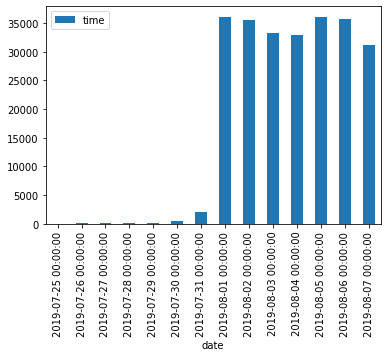

In [26]:
date.plot(x='date', y='time', kind='bar')
plt.show()

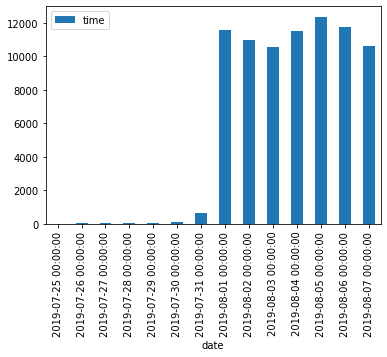

In [27]:
date_246 = data[data['ExpId'] == 246].groupby('date').agg({'time': 'count'}).reset_index()
date_246 = date_246.sort_values(by = 'date')
date_246.plot(x='date', y='time', kind='bar')
plt.show()

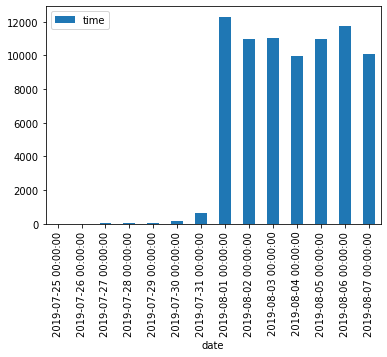

In [28]:
date_247 = data[data['ExpId'] == 247].groupby('date').agg({'time': 'count'}).reset_index()
date_247 = date_247.sort_values(by = 'date')
date_247.plot(x='date', y='time', kind='bar')
plt.show()

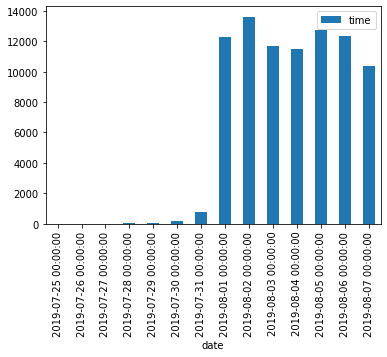

In [29]:
date_248 = data[data['ExpId'] == 248].groupby('date').agg({'time': 'count'}).reset_index()
date_248 = date_248.sort_values(by = 'date')
date_248.plot(x='date', y='time', kind='bar')
plt.show()

In [30]:
data_adjusted = data[data['date'] > '2019-07-31']

In [31]:
data_adjusted['first_visit_adjusted'] = 1 - data_adjusted[['DeviceIDHash']].duplicated()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
print('Количество событий уменьшилось', '{0:.2%}'.format(1-len(data_adjusted)/len(data)))
print('Количество событий до сокращения дат', len(data))
print('Количество событий после сокращения дат', len(data_adjusted))


Количество событий уменьшилось 1.16%
Количество событий до сокращения дат 243713
Количество событий после сокращения дат 240887


In [33]:
print('Количество пользователей уменьшилось', '{0:.2%}'.format(1-data_adjusted['first_visit_adjusted'].sum()/data['first_visit'].sum()))
print('Количество пользователей до сокращения дат', data['first_visit'].sum())
print('Количество пользователей после сокращения дат', data_adjusted['first_visit_adjusted'].sum())

Количество пользователей уменьшилось 0.23%
Количество пользователей до сокращения дат 7551
Количество пользователей после сокращения дат 7534


In [34]:
data_adjusted.groupby('ExpId').agg({'first_visit_adjusted': 'sum'})

,first_visit_adjusted
ExpId,
246,2484
247,2513
248,2537


# Вывод
   1. В работе существуют следующие логи: Main Screen Appear (появление основного экрана) - 119101, Offers Screen Appear  (пявление экрана предложения) - 46808, Cart Screen Appear (появление экрана корзины) - 42668, Payment Screen Successful (экран оплаты) - 34118, Tutorial (руководство) - 1018. __Можно выделить два поведения пользователей: для клиентов которые зашли 1 раз и для клиентов, которые совершают повторную покупку. Рассмотрим их действия:
      - Для клиентов совершающих свои дейтсвия первый раз: Main Screen Appear → Tutorial → Offers Screen Appear → Cart Screen Appear → Payment Screen Successful.
      - Для клиентов которые совершают повторные покупки Main Screen Appear → Offers Screen Appear → Cart Screen Appear → Payment Screen Successful. Tutorial - может возникать на разных этапах, необходим для повторения правильных действий (Это требует дополнительной проверки).
   2. Тест у нас проводился короткое время с 2019-07-25 по 2019-08-07 (14 дней). Как видно полноценно данные заработали только 2019-08-01. Поэтому отсекаем данные ранее 2019-08-01. При этом количество соыбтий уменьшилось на 1,16%, количество пользователей уменьшилось на 0,23%. 
   3. В данных у нас 7534 уникальных пользователей. Группа 246 - 2484 уникальных пользователе. Группа 247 - 2513 уникальных пользователей. Группа 248 - 2537 уникальных пользлователя. Группа А - 4997, Группа В - 2537.


# Шаг 3. Анализ воронки продаж

In [35]:
data_adjusted['week'] = data_adjusted['date'].dt.week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
dau_total = data_adjusted.groupby('date').agg({'first_visit_adjusted': 'sum'}).mean()


In [37]:
total_users = data_adjusted.groupby('date').agg({'first_visit_adjusted': 'count'}).mean()


In [38]:
print('Количество уникальных пользователей в день', int(dau_total))
print('Удержание клиентов в день', int(dau_total * 100/ total_users), '%')

Количество уникальных пользователей в день 1076
Удержание клиентов в день 3 %


In [39]:
dau_total_246 = data_adjusted[data_adjusted['ExpId'] == 246].groupby('date').agg({'first_visit_adjusted': 'sum'}).mean()
total_users_246 = data_adjusted[data_adjusted['ExpId'] == 246].groupby('date').agg({'first_visit_adjusted': 'count'}).mean()
print('Количество уникальных пользователей в день для 246 группы', int(dau_total_246))
print('Удержание клиентов для 246 группы', int(dau_total_246 * 100/ total_users_246), '%')

Количество уникальных пользователей в день для 246 группы 354
Удержание клиентов для 246 группы 3 %


In [40]:
dau_total_247= data_adjusted[data_adjusted['ExpId'] == 247].groupby('date').agg({'first_visit_adjusted': 'sum'}).mean()
total_users_247 = data_adjusted[data_adjusted['ExpId'] == 247].groupby('date').agg({'first_visit_adjusted': 'count'}).mean()
print('Количество уникальных пользователей в день для 246 группы', int(dau_total_247))
print('Удержание клиентов для 246 группы', int(dau_total_247 * 100/ total_users_247), '%')

Количество уникальных пользователей в день для 246 группы 359
Удержание клиентов для 246 группы 3 %


In [41]:
dau_total_248= data_adjusted[data_adjusted['ExpId'] == 248].groupby('date').agg({'first_visit_adjusted': 'sum'}).mean()
total_users_248 = data_adjusted[data_adjusted['ExpId'] == 248].groupby('date').agg({'first_visit_adjusted': 'count'}).mean()
print('Количество уникальных пользователей в день для 246 группы', int(dau_total_248))
print('Удержание клиентов для 246 группы', int(dau_total_248 * 100/ total_users_248), '%')

Количество уникальных пользователей в день для 246 группы 362
Удержание клиентов для 246 группы 3 %


# Посмотреть, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [42]:
sales_funnel = data_adjusted.groupby('EventName').agg({'time': 'count'}).reset_index()
sales_funnel.sort_values(by='time', ascending = False, inplace=True)

In [43]:
sales_funnel.head()

,EventName,time
1,MainScreenAppear,117328
2,OffersScreenAppear,46333
0,CartScreenAppear,42303
3,PaymentScreenSuccessful,33918
4,Tutorial,1005


In [44]:
deviceid_hash = data_adjusted.groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()
deviceid_hash.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash
1,MainScreenAppear,7419
2,OffersScreenAppear,4593
0,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539
4,Tutorial,840


В целом лучше использовать воронку продаж, описывающую поведение пользователя как  __Main Screen Appear → Offers Screen Appear → Cart Screen Appear → Payment Screen Successful__

In [45]:
def sales(data):
    event_name = data['EventName']
    count = data['DeviceIDHash']
    if event_name == 'MainScreenAppear':
        return 100
    if event_name == 'OffersScreenAppear':
        return int(count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'MainScreenAppear', 'DeviceIDHash'])
    if event_name == 'CartScreenAppear':
        return int(count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'OffersScreenAppear', 'DeviceIDHash'])
    if event_name == 'PaymentScreenSuccessful':
        return int(count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'CartScreenAppear', 'DeviceIDHash'])
    if event_name == 'Tutorial':
        return int(count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'PaymentScreenSuccessful', 'DeviceIDHash'])

In [46]:
def sales_all(data):
    event_name = data['EventName']
    count = data['DeviceIDHash']
    if event_name == 'MainScreenAppear':
        return 100
    if event_name == 'OffersScreenAppear':
        return (count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'MainScreenAppear', 'DeviceIDHash'])
    if event_name == 'CartScreenAppear':
        return (count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'MainScreenAppear', 'DeviceIDHash'])
    if event_name == 'PaymentScreenSuccessful':
        return (count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'MainScreenAppear', 'DeviceIDHash'])
    if event_name == 'Tutorial':
        return (count * 100 / deviceid_hash.loc[deviceid_hash['EventName'] == 'MainScreenAppear', 'DeviceIDHash'])

In [47]:
deviceid_hash['retention_rate'] = deviceid_hash.apply(sales, axis = 1)
deviceid_hash['retention_rate_all'] = deviceid_hash.apply(sales_all, axis = 1)


In [48]:
deviceid_hash.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash,retention_rate,retention_rate_all
1,MainScreenAppear,7419,100,100.000000
2,OffersScreenAppear,4593,61,61.908613
0,CartScreenAppear,3734,81,50.330233
3,PaymentScreenSuccessful,3539,94,47.701847
4,Tutorial,840,23,11.322281


# Вывод
   1. Больше всего теряется на переходе от главного экрана к экрану предложения (39%).
   2. До оплаты доходит 47% пользователей.

Оценим воронку продаж для тех пользователей, которые заходят в систему 1 раз

In [49]:
deviceid_hash_first = data_adjusted[data_adjusted['first_visit_adjusted'] == 1].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()
deviceid_hash_first.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash
1,MainScreenAppear,6305
4,Tutorial,783
2,OffersScreenAppear,288
3,PaymentScreenSuccessful,96
0,CartScreenAppear,62


In [50]:
deviceid_hash_first['retention_rate_all'] = deviceid_hash_first.apply(sales_all, axis = 1)
deviceid_hash_first.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash,retention_rate_all
1,MainScreenAppear,6305,100.000000
4,Tutorial,783,10.553983
2,OffersScreenAppear,288,3.881925
3,PaymentScreenSuccessful,96,1.293975
0,CartScreenAppear,62,0.835692


# Вывод

Видно, что меньше 1% пользователей совершают первую покупку. При этом пользовательский сценарий для такой группы пользователей исмеет следующий вид: Main Screen Appear → Tutorial → Offers Screen Appear → Cart Screen Appear → Payment Screen Successful

In [51]:
deviceid_hash_second = data_adjusted[data_adjusted['first_visit_adjusted'] == 0].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()
deviceid_hash_second.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash
1,MainScreenAppear,7236
2,OffersScreenAppear,4571
0,CartScreenAppear,3731
3,PaymentScreenSuccessful,3526
4,Tutorial,133


In [52]:
deviceid_hash_second['retention_rate_all'] = deviceid_hash_second.apply(sales_all, axis = 1)
deviceid_hash_second.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash,retention_rate_all
1,MainScreenAppear,7236,100.000000
2,OffersScreenAppear,4571,61.612077
0,CartScreenAppear,3731,50.289796
3,PaymentScreenSuccessful,3526,47.526621
4,Tutorial,133,1.792694


# Вывод

Видно, что  47% пользователей совершают покупку при повторной покупке. При этом пользовательский сценарий для такой группы пользователей исмеет следующий вид: Main Screen Appear → Offers Screen Appear → Cart Screen Appear → Payment Screen Successful. Tutorial - носит вспомагательный характер, им пользуется около 1% вторичных пользователей. 

# Шаг 4. Изучить результаты эксперимента

Сколько пользователей в каждой экспериментальной группе

In [53]:
expid = data_adjusted.groupby('ExpId').agg({'DeviceIDHash': 'nunique'}).reset_index()
expid

,ExpId,DeviceIDHash
0,246,2484
1,247,2513
2,248,2537


В группе 246 - 2484 уникальных пользователя
В группе 247 - 2513 уникальных пользователя
В группе 248 - 2537 уникальных пользователя

# А/А-тест. Проверить, находят ли статистические критерии разницу между выборками 246 и 247.

#  <font color='red'> Комментарий наставника </font>
Я как и раньше призываю не перебивать константы руками :) 

In [54]:
expid['to_246'] = abs(1 - expid['DeviceIDHash'] / expid.loc[expid[expid['ExpId'] == 246].index.tolist()[0], 'DeviceIDHash'])

In [55]:
expid['to_247'] = abs( 1 - expid['DeviceIDHash'] / expid.loc[expid[expid['ExpId'] == 247].index.tolist()[0], 'DeviceIDHash'])

In [56]:
expid

,ExpId,DeviceIDHash,to_246,to_247
0,246,2484,0.000000,0.01154
1,247,2513,0.011675,0.00000
2,248,2537,0.021337,0.00955


In [57]:
'Соотношение по группам 246 и 247', 1-2484/2513

('Соотношение по группам 246 и 247', 0.011539992041384783)

In [58]:
'Соотношение по группам 246 и 248', 1-2484/2537

('Соотношение по группам 246 и 248', 0.020890815924320072)

In [59]:
'Соотношение по группам 247 и 248', 1-2513/2537

('Соотношение по группам 247 и 248', 0.009459992116673255)

In [60]:
users_246 = data_adjusted[data_adjusted['ExpId'] == 246].groupby('DeviceIDHash').agg({'time': 'count'}).reset_index()
users_247 = data_adjusted[data_adjusted['ExpId'] == 247].groupby('DeviceIDHash').agg({'time': 'count'}).reset_index()


In [61]:
users_246['replay'] = users_246['DeviceIDHash'].where(users_246['DeviceIDHash'].isin(users_247['DeviceIDHash']), 'норм')

In [62]:
users_246[users_246['replay'] != 'норм']

,DeviceIDHash,time,replay


In [63]:
log_246 = data_adjusted[data_adjusted['ExpId'] == 246].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()
log_247 = data_adjusted[data_adjusted['ExpId'] == 247].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()

In [64]:
log_246_247 = log_246.merge(log_247, left_on='EventName', right_on='EventName', how='left', suffixes=['246', '247'])
log_246_247['deviation'] = abs(100 - log_246_247['DeviceIDHash246']*100 / log_246_247['DeviceIDHash247'])

In [65]:
log_246_247.head()

,EventName,DeviceIDHash246,DeviceIDHash247,deviation
0,CartScreenAppear,1266,1238,2.261712
1,MainScreenAppear,2450,2476,1.050081
2,OffersScreenAppear,1542,1520,1.447368
3,PaymentScreenSuccessful,1200,1158,3.626943
4,Tutorial,278,283,1.766784


# Вывод
   1. Количество пользователей в различных группах различается не более, чем на 1%/
   2. Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же/
   3. Попавший в одну из групп посетитель остаётся в этой группе до конца теста. 
   4. Различие ключевых метрик по группам __превышает 1%__. <font color='red'>Как в данном случае поступать не знаю, потому что нам говорили, что для А/А теста по ключевым метрикам не должно быть расхождение более 1 %</font> 

In [66]:
for row in log_246_247['EventName']:
    print('При определении соотвествия среднего',  row, 'групп 246 и 247 различаются')
    print('H0 - средний', row, 'групп 246 и 247 одинаковый')
    print('Н1 - средний', row, 'групп 246 и 247 различаются')
    print ('Пороговое значение alpha 5%')
    alpha = 0.05
    data_246 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 246)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    data_247 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 247)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    a = stats.mannwhitneyu(data_246['DeviceIDHash'], data_247['DeviceIDHash'])[1]
    if a < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    print()

При определении соотвествия среднего CartScreenAppear групп 246 и 247 различаются
H0 - средний CartScreenAppear групп 246 и 247 одинаковый
Н1 - средний CartScreenAppear групп 246 и 247 различаются
Пороговое значение alpha 5%
Отвергаем нулевую гипотезу

При определении соотвествия среднего MainScreenAppear групп 246 и 247 различаются
H0 - средний MainScreenAppear групп 246 и 247 одинаковый
Н1 - средний MainScreenAppear групп 246 и 247 различаются
Пороговое значение alpha 5%
Не получилось отвергнуть нулевую гипотезу

При определении соотвествия среднего OffersScreenAppear групп 246 и 247 различаются
H0 - средний OffersScreenAppear групп 246 и 247 одинаковый
Н1 - средний OffersScreenAppear групп 246 и 247 различаются
Пороговое значение alpha 5%
Не получилось отвергнуть нулевую гипотезу

При определении соотвествия среднего PaymentScreenSuccessful групп 246 и 247 различаются
H0 - средний PaymentScreenSuccessful групп 246 и 247 одинаковый
Н1 - средний PaymentScreenSuccessful групп 246 и 247

# Вывод 

Как видно поведение пользователей групп 246 и 247 частично совпадает частично нет. <font color='red'>Есть ошибка как как ее исправить не знаю</font> 

# А/B-тест. Проверить, находят ли статистические критерии разницу между выборками 247 и 248.

In [67]:
log_248 = data_adjusted[data_adjusted['ExpId'] == 248].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()


In [68]:
log_246_247_248 = log_246_247.merge(log_248, left_on='EventName', right_on='EventName', how='left', suffixes=['A', 'B'])
log_246_247_248.columns = ['EventName', 'DeviceIDHash246', 'DeviceIDHash247', 'deviation 247/246', 'DeviceIDHash248']

In [69]:
log_246_247_248['deviation 248/246'] = abs(1 - log_246_247_248['DeviceIDHash248'] / log_246_247_248['DeviceIDHash246'])
log_246_247_248['deviation 248/247'] = abs(1 - log_246_247_248['DeviceIDHash248'] / log_246_247_248['DeviceIDHash247'])


In [70]:
log_246_247_248.head()

,EventName,DeviceIDHash246,DeviceIDHash247,deviation 247/246,DeviceIDHash248,deviation 248/246,deviation 248/247
0,CartScreenAppear,1266,1238,2.261712,1230,0.028436,0.006462
1,MainScreenAppear,2450,2476,1.050081,2493,0.017551,0.006866
2,OffersScreenAppear,1542,1520,1.447368,1531,0.007134,0.007237
3,PaymentScreenSuccessful,1200,1158,3.626943,1181,0.015833,0.019862
4,Tutorial,278,283,1.766784,279,0.003597,0.014134


# Вывод
   1. Количество пользователей в различных группах различается не более, чем на 1%.
   2. Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же.
   3. Различие ключевых метрик по группам __превышает 1%__. <font color='red'>Как в данном случае поступать не знаю, потому что нам говорили, что для А/А теста по ключевым метрикам не должно быть расхождение более 1 %</font> 

In [71]:
for row in log_246_247['EventName']:
    print('При определении соотвествия среднего',  row, 'групп 246 и 248 различаются')
    print('H0 - средний', row, 'групп 246 и 248 одинаковый')
    print('Н1 - средний', row, 'групп 246 и 248 различаются')
    print ('Пороговое значение alpha 10%')
    alpha = 0.1/3
    data_246 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 246)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    data_248 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 248)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    a = stats.mannwhitneyu(data_246['DeviceIDHash'], data_248['DeviceIDHash'])[1]
    if a < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    print()

При определении соотвествия среднего CartScreenAppear групп 246 и 248 различаются
H0 - средний CartScreenAppear групп 246 и 248 одинаковый
Н1 - средний CartScreenAppear групп 246 и 248 различаются
Пороговое значение alpha 10%
Не получилось отвергнуть нулевую гипотезу

При определении соотвествия среднего MainScreenAppear групп 246 и 248 различаются
H0 - средний MainScreenAppear групп 246 и 248 одинаковый
Н1 - средний MainScreenAppear групп 246 и 248 различаются
Пороговое значение alpha 10%
Не получилось отвергнуть нулевую гипотезу

При определении соотвествия среднего OffersScreenAppear групп 246 и 248 различаются
H0 - средний OffersScreenAppear групп 246 и 248 одинаковый
Н1 - средний OffersScreenAppear групп 246 и 248 различаются
Пороговое значение alpha 10%
Отвергаем нулевую гипотезу

При определении соотвествия среднего PaymentScreenSuccessful групп 246 и 248 различаются
H0 - средний PaymentScreenSuccessful групп 246 и 248 одинаковый
Н1 - средний PaymentScreenSuccessful групп 246 и 

# Вывод 

Как видно групп 246 и 248 не в полной мере соотвествует основным логам.

In [72]:
for row in log_246_247['EventName']:
    print('При определении соотвествия среднего',  row, 'групп 247 и 248 различаются')
    print('H0 - средний', row, 'групп 247 и 248 одинаковый')
    print('Н1 - средний', row, 'групп 247 и 248 различаются')
    print ('Пороговое значение alpha 10%')
    alpha = 0.1/3
    data_247 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 247)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    data_248 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 248)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    a = stats.mannwhitneyu(data_246['DeviceIDHash'], data_248['DeviceIDHash'])[1]
    if a < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
    print()

При определении соотвествия среднего CartScreenAppear групп 247 и 248 различаются
H0 - средний CartScreenAppear групп 247 и 248 одинаковый
Н1 - средний CartScreenAppear групп 247 и 248 различаются
Пороговое значение alpha 10%
Отвергаем нулевую гипотезу

При определении соотвествия среднего MainScreenAppear групп 247 и 248 различаются
H0 - средний MainScreenAppear групп 247 и 248 одинаковый
Н1 - средний MainScreenAppear групп 247 и 248 различаются
Пороговое значение alpha 10%
Отвергаем нулевую гипотезу

При определении соотвествия среднего OffersScreenAppear групп 247 и 248 различаются
H0 - средний OffersScreenAppear групп 247 и 248 одинаковый
Н1 - средний OffersScreenAppear групп 247 и 248 различаются
Пороговое значение alpha 10%
Отвергаем нулевую гипотезу

При определении соотвествия среднего PaymentScreenSuccessful групп 247 и 248 различаются
H0 - средний PaymentScreenSuccessful групп 247 и 248 одинаковый
Н1 - средний PaymentScreenSuccessful групп 247 и 248 различаются
Пороговое знач

# Вывод 

Как видно групп 247 и 248 различаются по всем основным логам.

# Построим графики и оценим как повлияло на группы изменение шрифта

<font color='red'> Прошу помощи по автомотиченскому выводу кода представленного внизу не могу построить раздельные графики. Может быть подскажите литературу </font>  

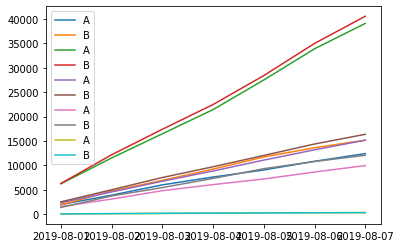

In [73]:
for row in log_246_247['EventName']:
    data_247 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 247)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    data_248 = data_adjusted[(data_adjusted['EventName'] == row) & (data_adjusted['ExpId'] == 248)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
    data_247['DeviceIDHash_cumsum'] = data_247['DeviceIDHash'].cumsum()
    data_248['DeviceIDHash_cumsum'] = data_248['DeviceIDHash'].cumsum()
    plt.plot(data_247['date'], data_247['DeviceIDHash_cumsum'], label='A')
    plt.plot(data_248['date'], data_248['DeviceIDHash_cumsum'], label='B')
    plt.legend()


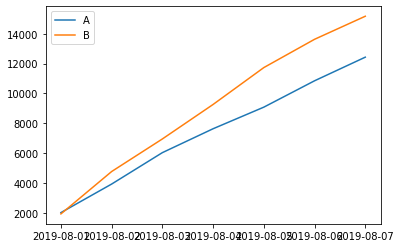

In [74]:
data_247_cartscreenappear = data_adjusted[(data_adjusted['EventName'] == 'CartScreenAppear') & (data_adjusted['ExpId'] == 247)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_248_cartscreenappear = data_adjusted[(data_adjusted['EventName'] == 'CartScreenAppear') & (data_adjusted['ExpId'] == 248)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_247_cartscreenappear['DeviceIDHash_cumsum'] = data_247_cartscreenappear['DeviceIDHash'].cumsum()
data_248_cartscreenappear['DeviceIDHash_cumsum'] = data_248_cartscreenappear['DeviceIDHash'].cumsum()
plt.plot(data_247_cartscreenappear['date'], data_247_cartscreenappear['DeviceIDHash_cumsum'], label='A')
plt.plot(data_248_cartscreenappear['date'], data_248_cartscreenappear['DeviceIDHash_cumsum'], label='B')
plt.legend()

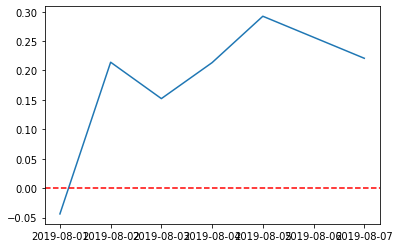

In [75]:
plt.plot(data_248_cartscreenappear['date'], (data_248_cartscreenappear['DeviceIDHash_cumsum']/data_247_cartscreenappear['DeviceIDHash_cumsum'])-1)
plt.axhline(y=0, color='red', linestyle='--')

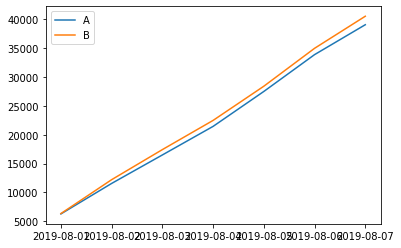

In [76]:
data_247_MainScreenAppear = data_adjusted[(data_adjusted['EventName'] == 'MainScreenAppear') & (data_adjusted['ExpId'] == 247)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_248_MainScreenAppear = data_adjusted[(data_adjusted['EventName'] == 'MainScreenAppear') & (data_adjusted['ExpId'] == 248)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_247_MainScreenAppear['DeviceIDHash_cumsum'] = data_247_MainScreenAppear['DeviceIDHash'].cumsum()
data_248_MainScreenAppear['DeviceIDHash_cumsum'] = data_248_MainScreenAppear['DeviceIDHash'].cumsum()
plt.plot(data_247_MainScreenAppear['date'], data_247_MainScreenAppear['DeviceIDHash_cumsum'], label='A')
plt.plot(data_248_MainScreenAppear['date'], data_248_MainScreenAppear['DeviceIDHash_cumsum'], label='B')
plt.legend()

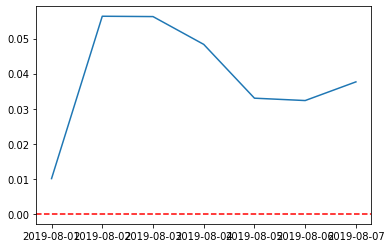

In [77]:
plt.plot(data_248_MainScreenAppear['date'], (data_248_MainScreenAppear['DeviceIDHash_cumsum']/data_247_MainScreenAppear['DeviceIDHash_cumsum'])-1)
plt.axhline(y=0, color='red', linestyle='--')

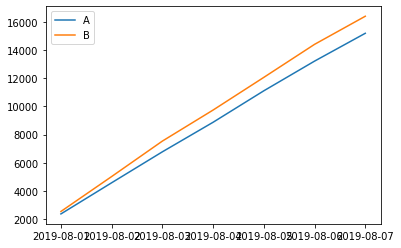

In [78]:
data_247_OffersScreenAppear = data_adjusted[(data_adjusted['EventName'] == 'OffersScreenAppear') & (data_adjusted['ExpId'] == 247)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_248_OffersScreenAppear = data_adjusted[(data_adjusted['EventName'] == 'OffersScreenAppear') & (data_adjusted['ExpId'] == 248)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_247_OffersScreenAppear['DeviceIDHash_cumsum'] = data_247_OffersScreenAppear['DeviceIDHash'].cumsum()
data_248_OffersScreenAppear['DeviceIDHash_cumsum'] = data_248_OffersScreenAppear['DeviceIDHash'].cumsum()
plt.plot(data_247_OffersScreenAppear['date'], data_247_OffersScreenAppear['DeviceIDHash_cumsum'], label='A')
plt.plot(data_248_OffersScreenAppear['date'], data_248_OffersScreenAppear['DeviceIDHash_cumsum'], label='B')
plt.legend()

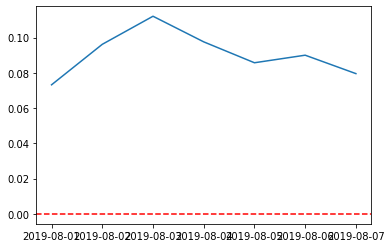

In [79]:
plt.plot(data_248_OffersScreenAppear['date'], (data_248_OffersScreenAppear['DeviceIDHash_cumsum']/data_247_OffersScreenAppear['DeviceIDHash_cumsum'])-1)
plt.axhline(y=0, color='red', linestyle='--')

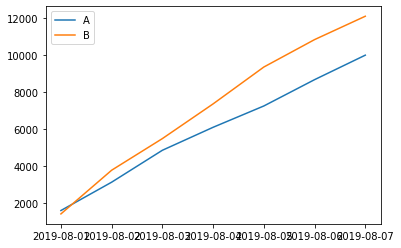

In [80]:
data_247_PaymentScreenSuccessful = data_adjusted[(data_adjusted['EventName'] == 'PaymentScreenSuccessful') & (data_adjusted['ExpId'] == 247)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_248_PaymentScreenSuccessful = data_adjusted[(data_adjusted['EventName'] == 'PaymentScreenSuccessful') & (data_adjusted['ExpId'] == 248)].groupby('date').agg({'DeviceIDHash': 'count'}).reset_index()
data_247_PaymentScreenSuccessful['DeviceIDHash_cumsum'] = data_247_PaymentScreenSuccessful['DeviceIDHash'].cumsum()
data_248_PaymentScreenSuccessful['DeviceIDHash_cumsum'] = data_248_PaymentScreenSuccessful['DeviceIDHash'].cumsum()
plt.plot(data_247_PaymentScreenSuccessful['date'], data_247_PaymentScreenSuccessful['DeviceIDHash_cumsum'], label='A')
plt.plot(data_248_PaymentScreenSuccessful['date'], data_248_PaymentScreenSuccessful['DeviceIDHash_cumsum'], label='B')
plt.legend()

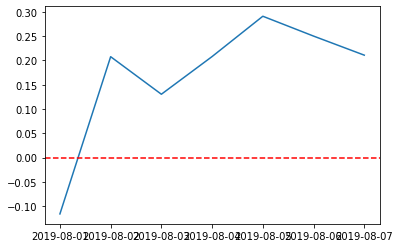

In [81]:
plt.plot(data_248_PaymentScreenSuccessful['date'], (data_248_PaymentScreenSuccessful['DeviceIDHash_cumsum']/data_247_PaymentScreenSuccessful['DeviceIDHash_cumsum'])-1)
plt.axhline(y=0, color='red', linestyle='--')

In [82]:
expid = data_adjusted.groupby('ExpId').agg({'DeviceIDHash': 'nunique'}).reset_index()

In [83]:
for row in expid['ExpId']:
    print('Воронка продаж группы', row)
    deviceid_hash = data_adjusted[data_adjusted['ExpId'] == row].groupby('EventName').agg({'DeviceIDHash': 'count'}).reset_index()
    deviceid_hash.sort_values(by='DeviceIDHash', ascending = False)
    deviceid_hash['retention_rate'] = deviceid_hash.apply(sales, axis = 1)
    deviceid_hash['retention_rate_all'] = deviceid_hash.apply(sales_all, axis = 1)
    print(deviceid_hash.sort_values(by='retention_rate_all', ascending = False))
    print()

Воронка продаж группы 246
                 EventName  DeviceIDHash  retention_rate  retention_rate_all
1         MainScreenAppear         37676             100          100.000000
2       OffersScreenAppear         14767              39           39.194713
0         CartScreenAppear         14690              99           38.990339
3  PaymentScreenSuccessful         11852              80           31.457692
4                 Tutorial           317               2            0.841384

Воронка продаж группы 247
                 EventName  DeviceIDHash  retention_rate  retention_rate_all
1         MainScreenAppear         39090             100          100.000000
2       OffersScreenAppear         15179              38           38.830903
0         CartScreenAppear         12434              81           31.808647
3  PaymentScreenSuccessful          9981              80           25.533384
4                 Tutorial           338               3            0.864671

Воронка продаж группы 

In [84]:
date = data_adjusted.groupby(['date', 'EventName', 'ExpId']).agg({'DeviceIDHash': 'nunique'}).reset_index()

In [85]:
date_uniq = data_adjusted.groupby('date').count().reset_index()

In [86]:
share = []
for i in date_uniq['date']:
    index_pay_246 = date[(date['date'] == i) & (date['ExpId'] == 246) & (date['EventName'] == 'PaymentScreenSuccessful')].index.tolist()[0]
    index_pay_247 = date[(date['date'] == i) & (date['ExpId'] == 247) & (date['EventName'] == 'PaymentScreenSuccessful')].index.tolist()[0]
    index_pay_248 = date[(date['date'] == i) & (date['ExpId'] == 248) & (date['EventName'] == 'PaymentScreenSuccessful')].index.tolist()[0]
    index_main_246 = date[(date['date'] == i) & (date['ExpId'] == 246) & (date['EventName'] == 'MainScreenAppear')].index.tolist()[0]
    index_main_247 = date[(date['date'] == i) & (date['ExpId'] == 247) & (date['EventName'] == 'MainScreenAppear')].index.tolist()[0]
    index_main_248 = date[(date['date'] == i) & (date['ExpId'] == 248) & (date['EventName'] == 'MainScreenAppear')].index.tolist()[0]   
    share_246 = date.loc[index_pay_246, 'DeviceIDHash'] / date.loc[index_main_246, 'DeviceIDHash']
    share_247 = date.loc[index_pay_247, 'DeviceIDHash'] / date.loc[index_main_247, 'DeviceIDHash']
    share_248 = date.loc[index_pay_248, 'DeviceIDHash'] / date.loc[index_main_248, 'DeviceIDHash']
    share.append(share_246)
    share.append(share_247)
    share.append(share_248)

In [87]:
share = pd.DataFrame(share,columns=['share'])

In [88]:
analysis = data_adjusted.groupby(['date', 'ExpId']).agg({'DeviceIDHash': 'count'}).reset_index()
analysis = analysis.join(share)
analysis_246 = analysis[analysis['ExpId'] == 246]
analysis_247 = analysis[analysis['ExpId'] == 247]
analysis_248 = analysis[analysis['ExpId'] == 248]


In [89]:
analysis_246

,date,ExpId,DeviceIDHash,share
0,2019-08-01,246,11561,0.396491
3,2019-08-02,246,10946,0.409965
6,2019-08-03,246,10575,0.448563
9,2019-08-04,246,11514,0.417790
12,2019-08-05,246,12368,0.406121
15,2019-08-06,246,11726,0.400000
18,2019-08-07,246,10612,0.405949


In [90]:
analysis[analysis['ExpId'] == 246]

,date,ExpId,DeviceIDHash,share
0,2019-08-01,246,11561,0.396491
3,2019-08-02,246,10946,0.409965
6,2019-08-03,246,10575,0.448563
9,2019-08-04,246,11514,0.417790
12,2019-08-05,246,12368,0.406121
15,2019-08-06,246,11726,0.400000
18,2019-08-07,246,10612,0.405949


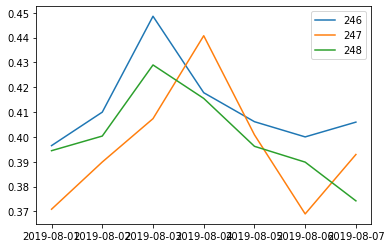

In [91]:
plt.plot(analysis[analysis['ExpId'] == 246]['date'], analysis[analysis['ExpId'] == 246]['share'], label='246')
plt.plot(analysis[analysis['ExpId'] == 247]['date'], analysis[analysis['ExpId'] == 247]['share'], label='247')
plt.plot(analysis[analysis['ExpId'] == 248]['date'], analysis[analysis['ExpId'] == 248]['share'], label='248')
plt.legend()

In [92]:
analysis_246_248 = analysis_246.merge(analysis_248, left_on='date', right_on='date', how='left', suffixes=['246', '248'])

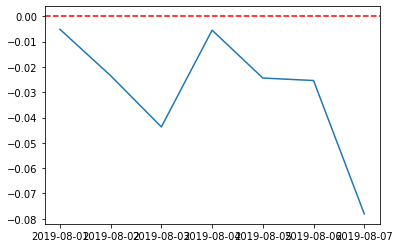

In [93]:
plt.plot(analysis_246_248['date'], (analysis_246_248['share248']/analysis_246_248['share246'])-1)
plt.axhline(y=0, color='red', linestyle='--')

In [94]:
analysis_247_248 = analysis_247.merge(analysis_248, left_on='date', right_on='date', how='left', suffixes=['247', '248'])

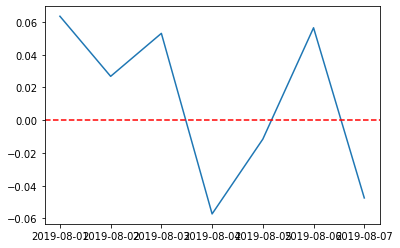

In [95]:
plt.plot(analysis_247_248['date'], (analysis_247_248['share248']/analysis_247_248['share247'])-1)
plt.axhline(y=0, color='red', linestyle='--')

In [96]:
import math as mth

In [97]:
deviceid_hash_246 = data_adjusted[data_adjusted['ExpId'] == 246].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()
deviceid_hash_246.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash
1,MainScreenAppear,2450
2,OffersScreenAppear,1542
0,CartScreenAppear,1266
3,PaymentScreenSuccessful,1200
4,Tutorial,278


In [98]:
deviceid_hash_247 = data_adjusted[data_adjusted['ExpId'] == 247].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()
deviceid_hash_247.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash
1,MainScreenAppear,2476
2,OffersScreenAppear,1520
0,CartScreenAppear,1238
3,PaymentScreenSuccessful,1158
4,Tutorial,283


In [99]:
deviceid_hash_248 = data_adjusted[data_adjusted['ExpId'] == 248].groupby('EventName').agg({'DeviceIDHash': 'nunique'}).reset_index()
deviceid_hash_248.sort_values(by='DeviceIDHash', ascending = False)

,EventName,DeviceIDHash
1,MainScreenAppear,2493
2,OffersScreenAppear,1531
0,CartScreenAppear,1230
3,PaymentScreenSuccessful,1181
4,Tutorial,279


In [100]:
deviceid_hash_247.head()

,EventName,DeviceIDHash
0,CartScreenAppear,1238
1,MainScreenAppear,2476
2,OffersScreenAppear,1520
3,PaymentScreenSuccessful,1158
4,Tutorial,283


In [101]:
log_246_247

,EventName,DeviceIDHash246,DeviceIDHash247,deviation
0,CartScreenAppear,1266,1238,2.261712
1,MainScreenAppear,2450,2476,1.050081
2,OffersScreenAppear,1542,1520,1.447368
3,PaymentScreenSuccessful,1200,1158,3.626943
4,Tutorial,278,283,1.766784


# Комментарий наставника
Давай ещё раз попытаемся эту штуку сделать. Тут что-то не то, судя по результатам.

1. Давай все-таки сделаем функцию и вызовем её трижды. Выгода будет очевидной. 
 1. Как минимум мы избежим опечаток, как в строчке `    index_248 = deviceid_hash_247[deviceid_hash_248 .... `. Обрати внимание на 247, хотя должно быть явно 248.
 2. Ты сможешь сделать формулы более легковесными, если передашь в функцию уже сами четыер нужных значения. Т.е. у тебя из формул пропадут монстры типа `deviceid_hash_248.loc[index_248, 'DeviceIDHash...` а будут более прозрачные выражения. 
2. Где-то есть ошибка. Посмотри, не перепутал ли ты условно trails и success, закрыл ли все скобки там, где нужно...  

Да, и обрати внимание, что в задании ещё есть ` Сравните результаты с объединённой контрольной группой.`, т.е. нужно сравнить 248 c (246+247). Не потеряй, пожалуйста, эту историю.

# Доработанный ответ после цикла. 

Цикл также исправил

In [102]:
for row_eventname in log_246_247['EventName']:
    print('Проверим гипотезу о равенстве долей для лога', row_eventname)
    index_246 = deviceid_hash_246[deviceid_hash_246['EventName'] == row_eventname].index.tolist()[0]
    index_247 = deviceid_hash_247[deviceid_hash_247['EventName'] == row_eventname].index.tolist()[0]
    index_248 = deviceid_hash_248[deviceid_hash_248['EventName'] == row_eventname].index.tolist()[0]
    p_246 = deviceid_hash_246.loc[index_246, 'DeviceIDHash'] / deviceid_hash_246['DeviceIDHash'].max()
    p_247 = deviceid_hash_247.loc[index_247, 'DeviceIDHash'] / deviceid_hash_247['DeviceIDHash'].max()
    p_248 = deviceid_hash_248.loc[index_248, 'DeviceIDHash'] / deviceid_hash_248['DeviceIDHash'].max()
    p_combined_246_247 = (deviceid_hash_246.loc[index_246, 'DeviceIDHash'] + deviceid_hash_247.loc[index_247, 'DeviceIDHash']) / (deviceid_hash_246['DeviceIDHash'].max() + deviceid_hash_247['DeviceIDHash'].max())
    p_combined_246_248 = (deviceid_hash_246.loc[index_246, 'DeviceIDHash'] + deviceid_hash_248.loc[index_248, 'DeviceIDHash']) / (deviceid_hash_246['DeviceIDHash'].max() + deviceid_hash_248['DeviceIDHash'].max())
    p_combined_247_248 = (deviceid_hash_247.loc[index_247, 'DeviceIDHash'] + deviceid_hash_248.loc[index_248, 'DeviceIDHash']) / (deviceid_hash_247['DeviceIDHash'].max() + deviceid_hash_248['DeviceIDHash'].max())
    difference_246_247 = p_246 - p_247
    difference_246_248 = p_246 - p_248
    difference_247_248 = p_247 - p_248
    z_value_246_247 = difference_246_247 / mth.sqrt(p_combined_246_247 * (1 - p_combined_246_247) * (1/deviceid_hash_246.loc[index_246, 'DeviceIDHash'] + 1/deviceid_hash_247.loc[index_247, 'DeviceIDHash']))
    z_value_246_248 = difference_246_248 / mth.sqrt(p_combined_246_248 * (1 - p_combined_246_248) * (1/deviceid_hash_246.loc[index_246, 'DeviceIDHash'] + 1/deviceid_hash_248.loc[index_248, 'DeviceIDHash']))
    z_value_247_248 = difference_247_248 / mth.sqrt(p_combined_247_248 * (1 - p_combined_247_248) * (1/deviceid_hash_247.loc[index_247, 'DeviceIDHash'] + 1/deviceid_hash_248.loc[index_248, 'DeviceIDHash']))
    distr = st.norm(0, 1)
    p_value_246_247 =  (1 - distr.cdf(abs(z_value_246_247))) * 2
    p_value_246_248 =  (1 - distr.cdf(abs(z_value_246_248))) * 2
    p_value_247_248 =  (1 - distr.cdf(abs(z_value_247_248))) * 2
    print()    
    print('Доли по логу',  row_eventname, 'групп 246 и 247 различаются')
    print('H0 - доли', row_eventname, 'групп 246 и 247 одинаковые')
    print('Н1 - доли', row_eventname, 'групп 246 и 247 различаются')
    print ('Пороговое значение alpha 0,05%')
    alpha = 0.05
    if p_value_246_247 < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print()
    print('Доли по логу',  row_eventname, 'групп 246 и 248 различаются')
    print('H0 - доли', row_eventname, 'групп 246 и 248 одинаковые')
    print('Н1 - доли', row_eventname, 'групп 246 и 248 различаются')
    print ('Пороговое значение alpha 0,05%')
    alpha = 0.05
    if p_value_246_248 < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print()
    print('Доли по логу',  row_eventname, 'групп 247 и 248 различаются')
    print('H0 - доли', row_eventname, 'групп 247 и 248 одинаковые')
    print('Н1 - доли', row_eventname, 'групп 247 и 248 различаются')
    print ('Пороговое значение alpha 0,05%')
    alpha = 0.05
    if p_value_247_248 < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print()
    print()

Проверим гипотезу о равенстве долей для лога CartScreenAppear

Доли по логу CartScreenAppear групп 246 и 247 различаются
H0 - доли CartScreenAppear групп 246 и 247 одинаковые
Н1 - доли CartScreenAppear групп 246 и 247 различаются
Пороговое значение alpha 0,05%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу CartScreenAppear групп 246 и 248 различаются
H0 - доли CartScreenAppear групп 246 и 248 одинаковые
Н1 - доли CartScreenAppear групп 246 и 248 различаются
Пороговое значение alpha 0,05%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу CartScreenAppear групп 247 и 248 различаются
H0 - доли CartScreenAppear групп 247 и 248 одинаковые
Н1 - доли CartScreenAppear групп 247 и 248 различаются
Пороговое значение alpha 0,05%
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Проверим гипотезу о равенстве долей для лога MainScreenAppear

Доли по логу MainScreenAppear групп 246 и 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [103]:
def stat_ch(group_1, group_2, data, alfa):
    df1 = data[data['ExpId'] == group_1]
    df2 = data[data['ExpId'] == group_2]
    user_all_1 = df1['DeviceIDHash'].nunique()
    user_all_2 = df2['DeviceIDHash'].nunique()
    for row in log_246_247['EventName']:
        users_1 = df1[df1['EventName'] == row]['DeviceIDHash'].nunique()
        users_2 = df2[df2['EventName'] == row]['DeviceIDHash'].nunique()
        successes = np.array([users_1, users_2])
        trials = np.array([user_all_1, user_all_2])
        p1 = successes[0]/trials[0]
        p2 = successes[1]/trials[1]
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
        difference = p1 - p2
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('Доли по логу',  row, 'групп', group_1, 'и', group_2, 'различаются')
        print('H0 - доли', row, 'групп', group_1, 'и', group_2, 'одинаковые')
        print('Н1 - доли', row, 'групп', group_1, 'и', group_2, 'различаются')
        print('p-значение: ', p_value)
        if (p_value < alpha):
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
        print()

In [104]:
stat_ch(246, 247, data_adjusted, 0.05)

Доли по логу CartScreenAppear групп 246 и 247 различаются
H0 - доли CartScreenAppear групп 246 и 247 одинаковые
Н1 - доли CartScreenAppear групп 246 и 247 различаются
p-значение:  0.22883372237997213
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу MainScreenAppear групп 246 и 247 различаются
H0 - доли MainScreenAppear групп 246 и 247 одинаковые
Н1 - доли MainScreenAppear групп 246 и 247 различаются
p-значение:  0.7570597232046099
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу OffersScreenAppear групп 246 и 247 различаются
H0 - доли OffersScreenAppear групп 246 и 247 одинаковые
Н1 - доли OffersScreenAppear групп 246 и 247 различаются
p-значение:  0.2480954578522181
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу PaymentScreenSuccessful групп 246 и 247 различаются
H0 - доли PaymentScreenSuccessful групп 246 и 247 одинаковые
Н1 - доли PaymentScreenSuccessful

In [105]:
stat_ch(246, 248, data_adjusted, 0.05)

Доли по логу CartScreenAppear групп 246 и 248 различаются
H0 - доли CartScreenAppear групп 246 и 248 одинаковые
Н1 - доли CartScreenAppear групп 246 и 248 различаются
p-значение:  0.07842923237520116
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу MainScreenAppear групп 246 и 248 различаются
H0 - доли MainScreenAppear групп 246 и 248 одинаковые
Н1 - доли MainScreenAppear групп 246 и 248 различаются
p-значение:  0.2949721933554552
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу OffersScreenAppear групп 246 и 248 различаются
H0 - доли OffersScreenAppear групп 246 и 248 одинаковые
Н1 - доли OffersScreenAppear групп 246 и 248 различаются
p-значение:  0.20836205402738917
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу PaymentScreenSuccessful групп 246 и 248 различаются
H0 - доли PaymentScreenSuccessful групп 246 и 248 одинаковые
Н1 - доли PaymentScreenSuccessfu

In [106]:
stat_ch(247, 248, data_adjusted, 0.05)

Доли по логу CartScreenAppear групп 247 и 248 различаются
H0 - доли CartScreenAppear групп 247 и 248 одинаковые
Н1 - доли CartScreenAppear групп 247 и 248 различаются
p-значение:  0.5786197879539783
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу MainScreenAppear групп 247 и 248 различаются
H0 - доли MainScreenAppear групп 247 и 248 одинаковые
Н1 - доли MainScreenAppear групп 247 и 248 различаются
p-значение:  0.4587053616621515
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу OffersScreenAppear групп 247 и 248 различаются
H0 - доли OffersScreenAppear групп 247 и 248 одинаковые
Н1 - доли OffersScreenAppear групп 247 и 248 различаются
p-значение:  0.9197817830592261
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу PaymentScreenSuccessful групп 247 и 248 различаются
H0 - доли PaymentScreenSuccessful групп 247 и 248 одинаковые
Н1 - доли PaymentScreenSuccessful 

In [107]:
data_adjusted_AB = data_adjusted.copy()

In [108]:
data_adjusted_AB.loc[data_adjusted_AB['ExpId'] == 246, 'ExpId'] = 'A'
data_adjusted_AB.loc[data_adjusted_AB['ExpId'] == 247, 'ExpId'] = 'A'
data_adjusted_AB.loc[data_adjusted_AB['ExpId'] == 248, 'ExpId'] = 'B'


In [109]:
data_adjusted_AB.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,time,date,first_visit,first_visit_adjusted,week
2826,Tutorial,3737462046622621720,1564618048,A,2019-08-01 00:07:28,2019-08-01,1,1,31
2827,MainScreenAppear,3737462046622621720,1564618080,A,2019-08-01 00:08:00,2019-08-01,0,0,31
2828,MainScreenAppear,3737462046622621720,1564618135,A,2019-08-01 00:08:55,2019-08-01,0,0,31
2829,OffersScreenAppear,3737462046622621720,1564618138,A,2019-08-01 00:08:58,2019-08-01,0,0,31
2830,MainScreenAppear,1433840883824088890,1564618139,A,2019-08-01 00:08:59,2019-08-01,1,1,31


In [110]:
stat_ch('A', 'B', data_adjusted_AB, 0.05)

Доли по логу CartScreenAppear групп A и B различаются
H0 - доли CartScreenAppear групп A и B одинаковые
Н1 - доли CartScreenAppear групп A и B различаются
p-значение:  0.18175875284404386
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу MainScreenAppear групп A и B различаются
H0 - доли MainScreenAppear групп A и B одинаковые
Н1 - доли MainScreenAppear групп A и B различаются
p-значение:  0.29424526837179577
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу OffersScreenAppear групп A и B различаются
H0 - доли OffersScreenAppear групп A и B одинаковые
Н1 - доли OffersScreenAppear групп A и B различаются
p-значение:  0.43425549655188256
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу PaymentScreenSuccessful групп A и B различаются
H0 - доли PaymentScreenSuccessful групп A и B одинаковые
Н1 - доли PaymentScreenSuccessful групп A и B различаются
p-значение:  0.60

# <font color='red'> Объясни, почему мы должны использовать в данном виде __.nunique()__ </font>

Я не согласен с данным утверждением по следующим причинам:
   1. Поведение потребителя намного сложнение, чем по схеме _Main Screen Appear → Offers Screen Appear → Cart Screen Appear → Payment Screen Successful_. В его поведении могут быть различные вариации, которые могут приводить к "лучшему" успеху, что и показывает использование .count()
   2. .nunique() данная форма, если я ее правильно понимаю, находит уникальный id пользователя и выбирает только один вариант: движение по цепочке _Main Screen Appear → Offers Screen Appear → Cart Screen Appear → Payment Screen Successful_. __А если он заходил каждый день или два раза в день?__. Соотвественно это также может быть связано с изменением шрифта. В данном случае .nunique() лучше использовать при определении посуточной конверсии, как это сделано на графиках, и сразу видно, что изменение шрифта несет отритцательное значение и значение в группах не стабилизировалось.

# Попытка ответа
Хороший вопрос на самом деле. Я бы как-то так сформулировал:
1. Мы проверяем, какая доля пользователей, оказавшаяся на шаге Х переходит к следующему шагу Х+1
2. Какая доля переходов на шаг Х ведет к переходу на шаг Х+1.

Мне кажется, если честно, что у двух этих вариантов есть плюсы и минусы. Ты верно заметил, что, вариант 1 (nunique) ведет к потере информации о том, что пользователь мог дваждый перейти с шага Х на шаг Х+1, а ведь это довольно значимо. 

С другой стороны, давай рассмотрим твой вариант. У него тоже есть недостаток. Нам важно, в конце концов, чтобы пользователь сделал переход на следующий шаг. Может ведь быть два таких поведения:
`Шаг1- Шаг2 - Шаг1 - Шаг2 - Шаг3`
или
`Шаг1- Шаг2 - Шаг1 - Шаг2 - Шаг1 - Шаг2 - Шаг3`

Во втором случае конверсия из шага 2 в шаг 3 будет меньше, если считать просто count. Но в действительности пользователь пришел и точно также дошел до нужного нам шага 3. Можно, конечно, обсуждать тот факт, что ему потребовалось больше суеты для этого, но сделал ведь в итоге :) 

И ещё один пример: 
`Шаг1- Шаг2 - Шаг1 - Шаг2`
или
`Шаг1- Шаг2 - Шаг1 - Шаг2 - Шаг1 - Шаг2`

Count сильнее "оштрафует" конверсию за то, что шагов 1 и 2 много, а третьего нет. А вариант с nunique так штрафовать не будет. Действительно ли нам важно, сколько шагов 1 и 2 сделал пользователь, если он потом не сделал шаг 3? Для unique оба эти варианта одинаковы (один пользователь не дошел до шага 3), а для count второй вариант хуже первого, т.к. Шагов 1 и 2 больше, а шага 3 - нет. Это не очень-то логично не так ли?

Мне кажется, хорошего варианта нет. Возможно, если бы у нас были идентификаторы условных сессий, то было бы логично считать кол-во сессий где мы перешли от Шага N к шагу N+1. А так, вариант с nunique больше заточен на ответ на вопрос: насколько чаще мы заставили пользователя дойти до нужной кнопки (почти наверняка она называется Купить :) ), а вариант с count отвечает на вопрос: насколько быстрее пользователь доходит до нужной кнопки.

Можешь попробовать закинуть это в преподавателя и послушать его ответ. Возможно, есть нюансы, о которых я не догадался. 

# Вывод 

Изменение шрифта не приводит к изменение конверсии на сайте